In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_analytics_lib as dal
import random


# Exercise 1

## Python function to read in the data from the file Baseball_Team_Salaries.csv and put the data into the data structures

In [19]:
def read_baseball_data(file_path):

    year = []
    team = []
    wins = []
    losses = []
    win_percentage = []
    salary = []
    
    with open(file_path, 'r') as file:
        data = file.readlines()
    
        for line in data[1:]:  # Skip header line
            lines = line.split(',')
            year.append(int(lines[0]))
            team.append(lines[1])
            wins.append(int(lines[2]))
            losses.append(int(lines[3]))
            win_percentage.append(float(lines[4]))
            salary.append(float(lines[5]))
        
    return year, team, wins, losses, win_percentage, salary



years_list, teams_list, wins_list, losses_list, wp_list, salary_list = read_baseball_data('/Users/244213/Desktop/DataAnalytics/Stats/Baseball_Team_Salaries.csv')



def organize_data_by_year_and_team(years_list, teams_list, wins_list, losses_list, wp_list, salary_list):
    
    yearly_data = {}
    team_data = {}
    
    unique_years = np.unique(years_list)
    
    for year in unique_years:
        
        temp_teams_list = []
        temp_wins_list = []
        temp_losses_list = []
        temp_wp_list = []
        temp_salary_list = []
        
        for i in range(len(years_list)):
            if years_list[i] == year:
                temp_teams_list.append(teams_list[i])
                temp_wins_list.append(wins_list[i])
                temp_losses_list.append(losses_list[i])
                temp_wp_list.append(wp_list[i])
                temp_salary_list.append(salary_list[i])
                
        yearly_data[year] = {
            'teams': temp_teams_list,
            'wins': temp_wins_list,
            'losses': temp_losses_list,
            'win_percentage': temp_wp_list,
            'salary': temp_salary_list
        }
        
    unique_teams = np.unique(teams_list)

    for team in unique_teams:
        
        temp_years_list = []
        temp_wins_list = []
        temp_losses_list = []
        temp_wp_list = []
        temp_salary_list = []
        
        for i in range(len(teams_list)):
            if teams_list[i] == team:
                temp_years_list.append(years_list[i])
                temp_wins_list.append(wins_list[i])
                temp_losses_list.append(losses_list[i])
                temp_wp_list.append(wp_list[i])
                temp_salary_list.append(salary_list[i])
                
        team_data[team] = {
            'years': temp_years_list,
            'wins': temp_wins_list,
            'losses': temp_losses_list,
            'win_percentage': temp_wp_list,
            'salary': temp_salary_list
        }
        
    return yearly_data, team_data
    
yearly_data_structure, team_data_structure = organize_data_by_year_and_team(years_list, teams_list, wins_list, losses_list, wp_list, salary_list)

print(yearly_data_structure)
print(team_data_structure)
        

{np.int64(1986): {'teams': ['New York Mets', 'Philadelphia Phillies', 'St. Louis Cardinals', 'Montreal Expos', 'Chicago Cubs', 'Pittsburgh Pirates', 'Houston Astros', 'Cincinnati Reds', 'San Francisco Giants', 'San Diego Padres', 'Los Angeles Dodgers', 'Atlanta Braves'], 'wins': [108, 86, 79, 78, 70, 64, 96, 86, 83, 74, 73, 72], 'losses': [54, 75, 82, 83, 90, 98, 66, 76, 79, 88, 89, 89], 'win_percentage': [0.667, 0.534, 0.491, 0.484, 0.438, 0.395, 0.593, 0.531, 0.512, 0.457, 0.451, 0.447], 'salary': [13597780.0, 11715166.0, 9481677.0, 11937394.0, 16904832.0, 10231500.0, 10368276.0, 11785036.0, 8682000.0, 11897522.0, 15471276.0, 17940286.0]}, np.int64(1987): {'teams': ['St. Louis Cardinals', 'New York Mets', 'Montreal Expos', 'Pittsburgh Pirates', 'Philadelphia Phillies', 'Chicago Cubs', 'San Francisco Giants', 'Cincinnati Reds', 'Houston Astros', 'Los Angeles Dodgers', 'Atlanta Braves', 'San Diego Padres'], 'wins': [95, 92, 91, 80, 80, 76, 90, 84, 76, 73, 69, 65], 'losses': [67, 70, 71

# Exercise 2

## 1. Use your existing statistics function to compute mean , median ,standard deviation, min and max for the all the team salaries for year each.

In [20]:
# Salary Statistics Over Years
salary_means = []
salary_medians = []
salary_stds = []
salary_mins = []
salary_maxs = []

for i in range(len(yearly_data_structure)):
    
    year = list(yearly_data_structure.keys())[i]
    salaries = yearly_data_structure[year]['salary']
    
    mean_salary = dal.main_stats(salaries)['mean']
    median_salary = dal.main_stats(salaries)['median']
    std_salary = dal.main_stats(salaries)['std_dev']
    min_salary = dal.main_stats(salaries)['min']
    max_salary = dal.main_stats(salaries)['max']
    
    salary_means.append(mean_salary)
    salary_medians.append(median_salary)
    salary_stds.append(std_salary)
    salary_mins.append(min_salary)
    salary_maxs.append(max_salary)


## 2. Write a function to produce a plots of each of these statistics, all on one plot, as a function of year.

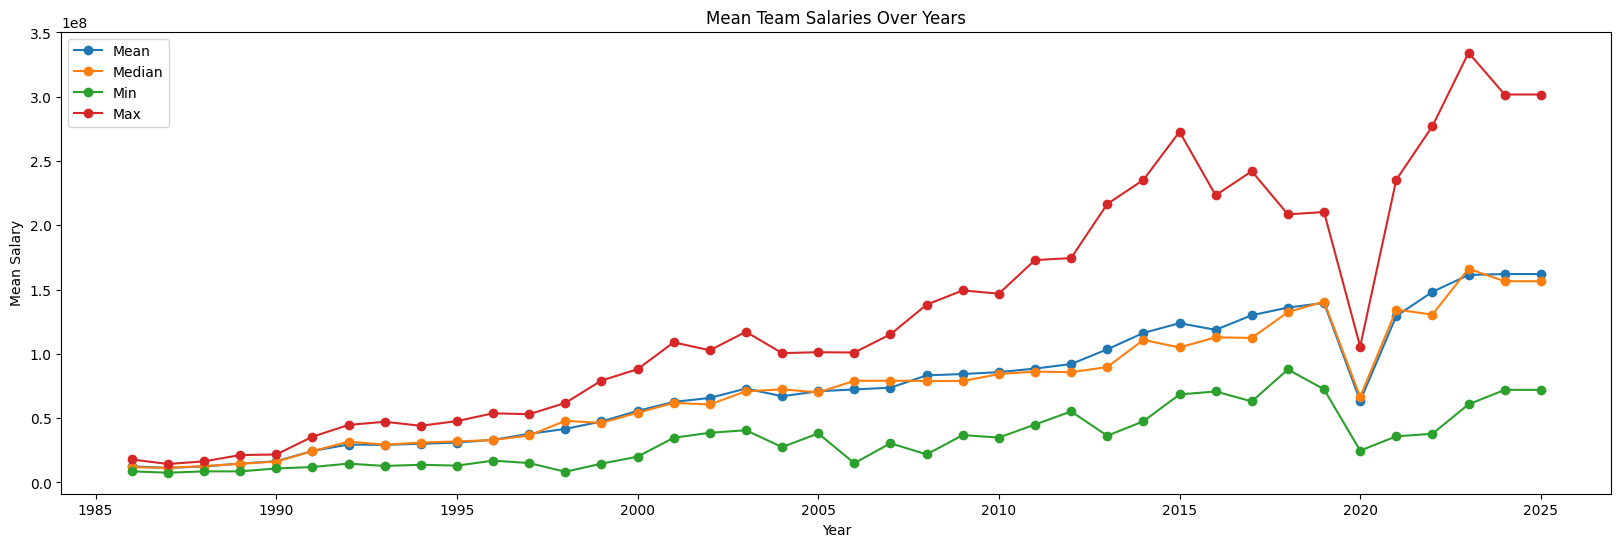

In [21]:
plt.figure(figsize=(20, 6))

plt.plot(list(yearly_data_structure.keys()), salary_means, marker='o', label='Mean')
plt.plot(list(yearly_data_structure.keys()), salary_medians, marker='o', label='Median')
plt.plot(list(yearly_data_structure.keys()), salary_mins, marker='o', label='Min')
plt.plot(list(yearly_data_structure.keys()), salary_maxs, marker='o', label='Max')

plt.legend()
plt.title('Mean Team Salaries Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.show()

## 3. Use your generic XY plot function, to plot the standard deviation of the team salaries for each year.

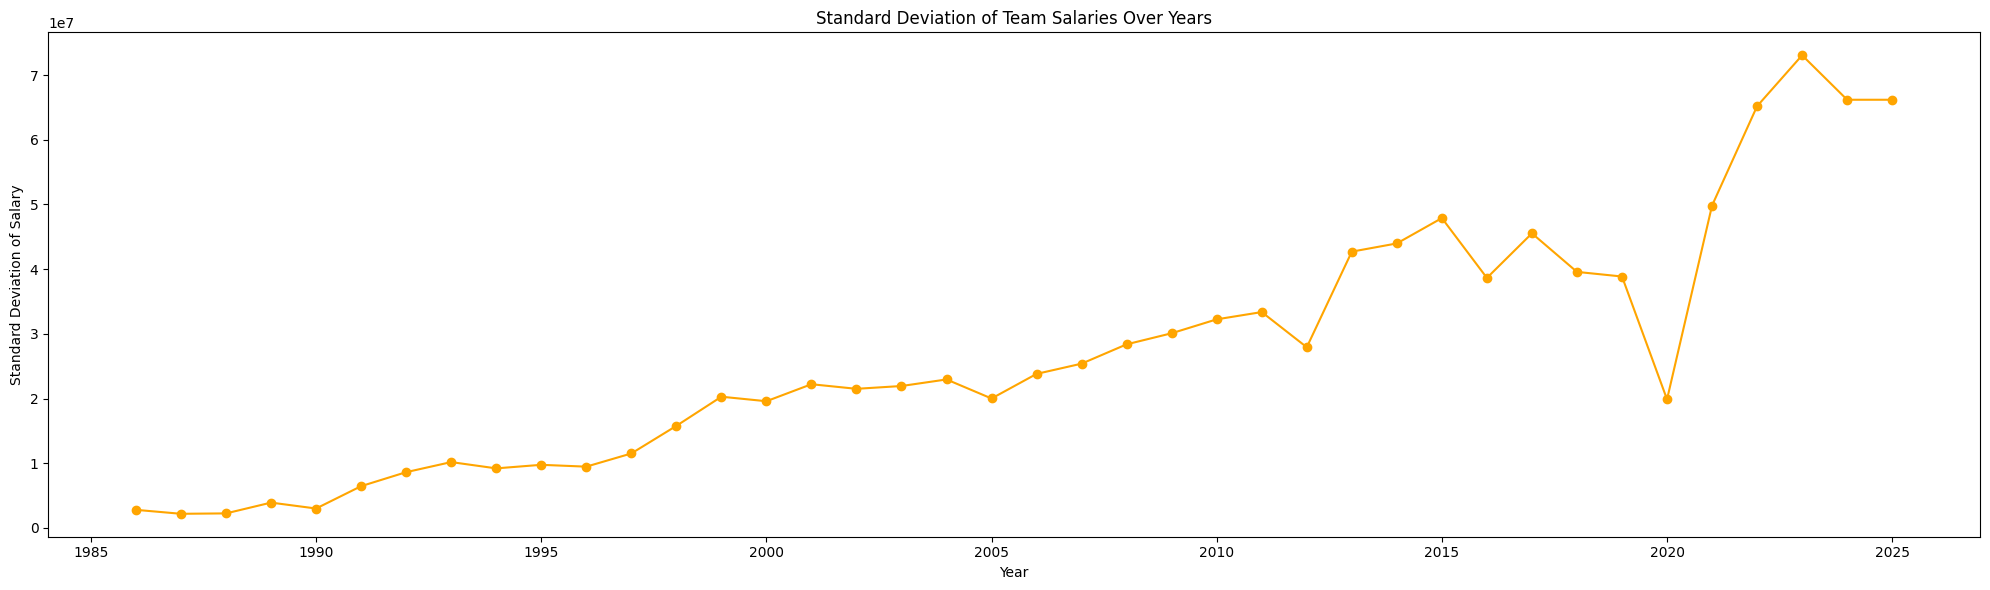

In [22]:
plt.figure(figsize=(20, 6))

dal.xy_plot(list(yearly_data_structure.keys()), salary_stds, 'Year', 'Standard Deviation of Salary', 'Standard Deviation of Team Salaries Over Years', marker='o', color='orange')

## 4. For each year, compute the ratio of the salary standard deviation to the salary mean. Plot this ratio as a function of years.

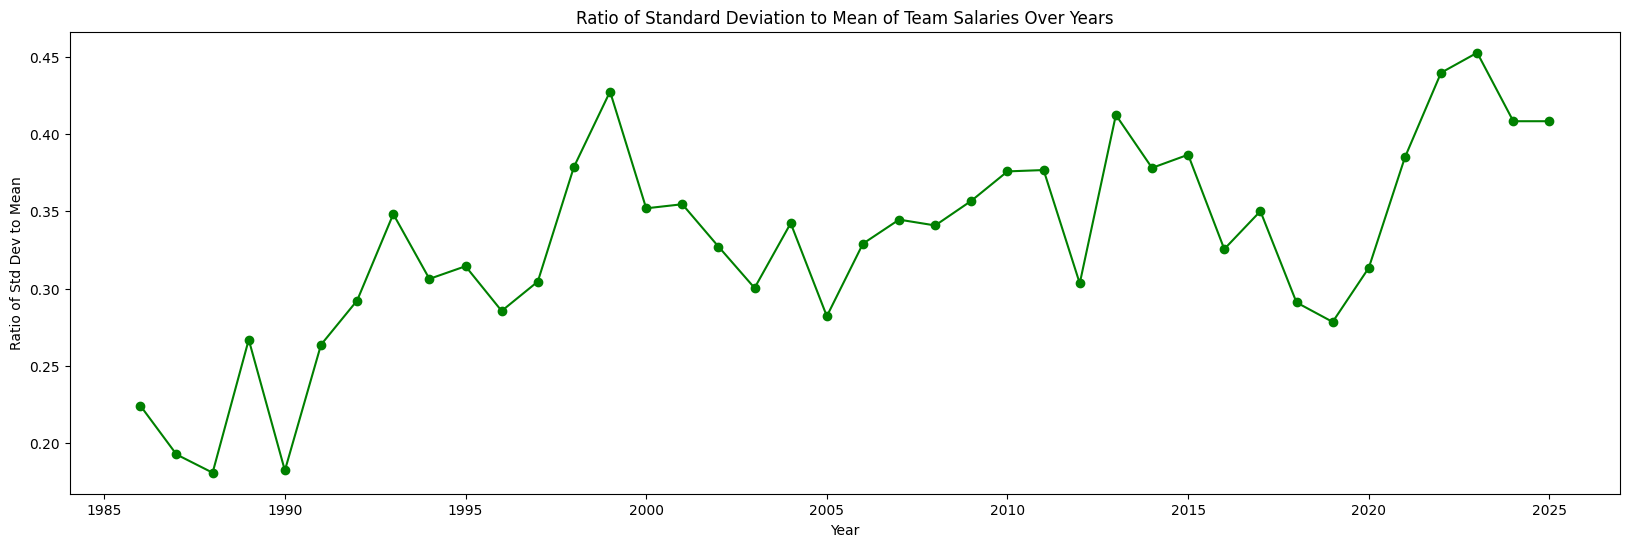

In [23]:
ratio_std_mean = np.array(salary_stds)/np.array(salary_means)

plt.figure(figsize=(20, 6))
plt.plot(list(yearly_data_structure.keys()), ratio_std_mean, marker='o', color='green')
plt.title('Ratio of Standard Deviation to Mean of Team Salaries Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio of Std Dev to Mean')
plt.show()

# Exercise 3

## Write a python function to compute the correlation coefficient, of winning percentage and salary, for all teams for each year, 1986 – 2025. From these results produce a plot of the data showing the correlation coefficient versus time.

{np.int64(1986): np.float64(-0.2152701489638564), np.int64(1987): np.float64(-0.21581181069030472), np.int64(1988): np.float64(0.15787314670321892), np.int64(1989): np.float64(0.5613360908446955), np.int64(1990): np.float64(0.3600462849240495), np.int64(1991): np.float64(0.39121406790700486), np.int64(1992): np.float64(-0.20177409377403574), np.int64(1993): np.float64(0.35885779637657084), np.int64(1994): np.float64(0.36102778821920606), np.int64(1995): np.float64(0.8550806225597992), np.int64(1996): np.float64(0.4163232996485897), np.int64(1997): np.float64(0.5326094371350734), np.int64(1998): np.float64(0.784763931435622), np.int64(1999): np.float64(0.664531527128188), np.int64(2000): np.float64(0.5609874289393957), np.int64(2001): np.float64(0.5291958136840965), np.int64(2002): np.float64(0.6048654046360977), np.int64(2003): np.float64(0.34059605072215493), np.int64(2004): np.float64(0.4265635173363188), np.int64(2005): np.float64(0.5140982611273622), np.int64(2006): np.float64(0.42

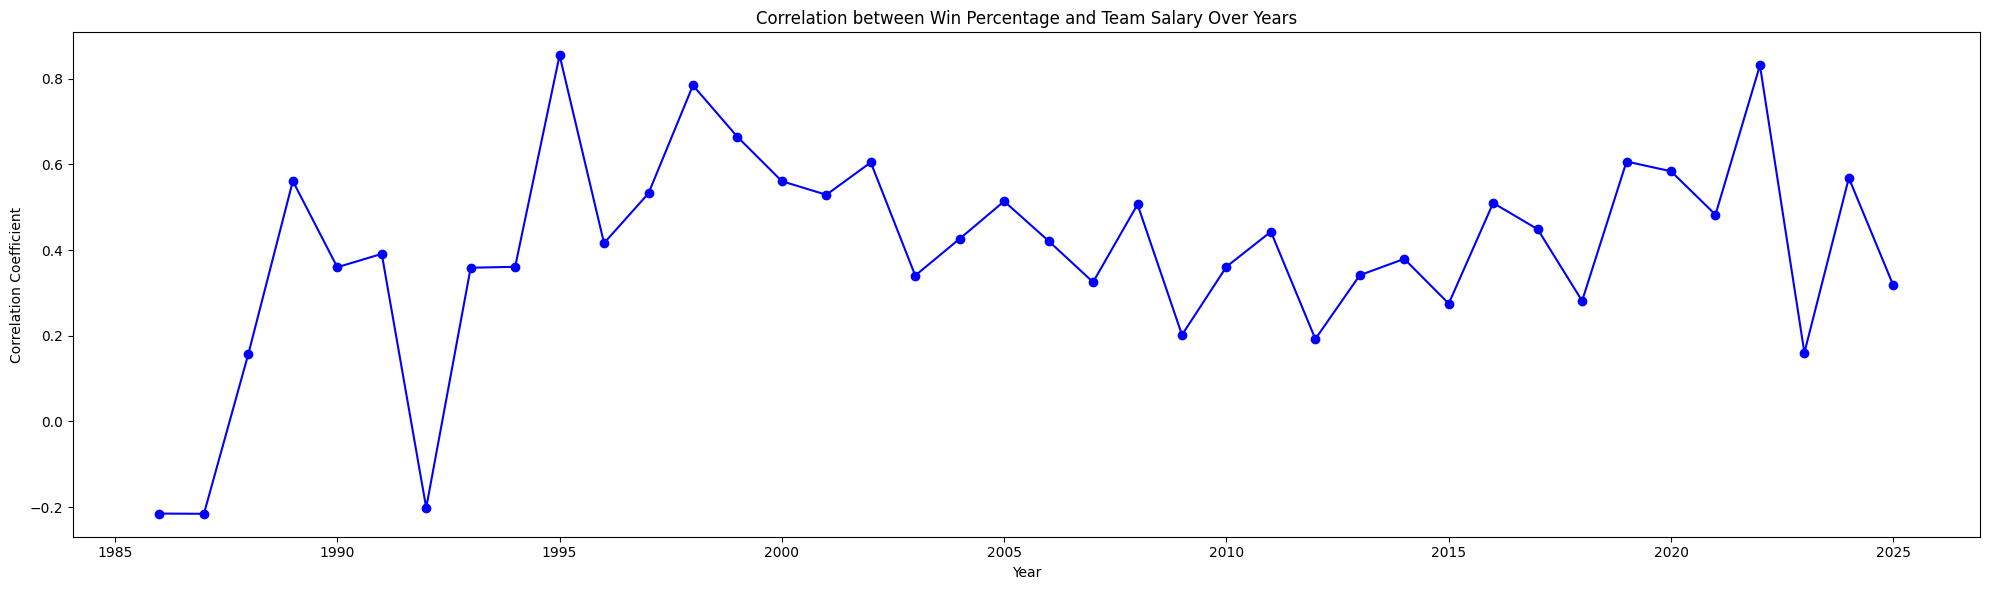

In [31]:
def corelation_wp_salary(yearly_data_structure):
    correlation_results = {}
    
    for year in yearly_data_structure:
        win_percentages = yearly_data_structure[year]['win_percentage']
        salaries = yearly_data_structure[year]['salary']
        
        correlation = dal.find_data_correlation(win_percentages, salaries)
        correlation_results[year] = correlation
        
    return correlation_results

corelation_coef_wp_salary = corelation_wp_salary(yearly_data_structure)

plt.figure(figsize=(20, 6))
dal.xy_plot(list(corelation_coef_wp_salary.keys()), list(corelation_coef_wp_salary.values()), 'Year', 'Correlation Coefficient', 'Correlation between Win Percentage and Team Salary Over Years', marker = 'o', color = 'blue')

    

# Exercise 4

## Python function to compute the correlation coefficient, between winning percentage and salary, for the top 5 teams by winning percentage, 1986 – 2025.

In [33]:
def top_5_teams_correlation_coef(yearly_data_structure):
    top_5_correlation = {}
    
    yearly_df = pd.DataFrame(yearly_data_structure)
    
    for year in yearly_df.columns:
        
        df_year = pd.DataFrame(yearly_df[year])
        
        df_year_sorted = df_year.sort_values(by = 'win_percentage', ascending = False).head(5)
        
        win_percentages_top5 = df_year_sorted['win_percentage'].tolist()
        salaries_top5 = df_year_sorted['salary'].tolist()
        
        correlation_top5 = dal.find_data_correlation(win_percentages_top5, salaries_top5)
        top_5_correlation[year] = correlation_top5
        
        return top_5_correlation
    
corelation_coef_top5_teams = top_5_teams_correlation_coef(yearly_data_structure)



                                                             1986
teams           [New York Mets, Philadelphia Phillies, St. Lou...
wins            [108, 86, 79, 78, 70, 64, 96, 86, 83, 74, 73, 72]
losses           [54, 75, 82, 83, 90, 98, 66, 76, 79, 88, 89, 89]
win_percentage  [0.667, 0.534, 0.491, 0.484, 0.438, 0.395, 0.5...
salary          [13597780.0, 11715166.0, 9481677.0, 11937394.0...


KeyError: 'win_percentage'